# Regresión Lineal: Costo de un incidente de seguridad
En est ejercicio se explican los fundamentos básicos de la regresión lineal aplicada a un caso de uso sencillo, relacionado con la Ciberseguridad.

### Enunciado del ejercicio

El ejercicio consiste en predecir el costo de un incidente de seguridad en base al númeron de equipos que sehan visto afectados. El conjunto de datso es generado de forma aleatoria.

# 1.- Generación del DataSet

In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

print("La longitud del DataSet es: ", len(X))

La longitud del DataSet es:  100


# 2.- Visualizacion del DataSet

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

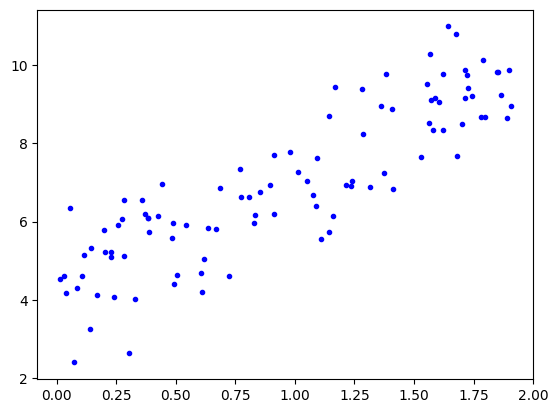

In [3]:
plt.plot (X, y, 'b.')
plt.show()

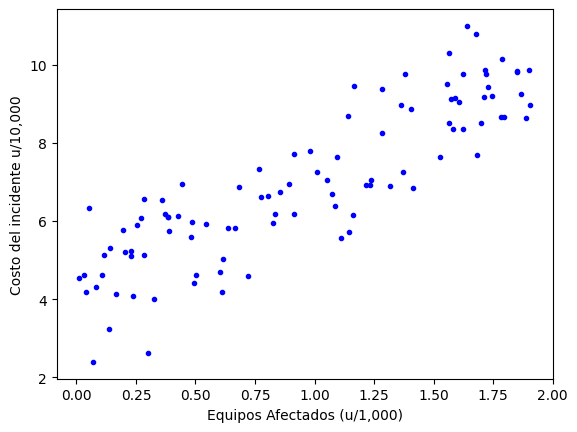

In [4]:
plt.plot(X, y, "b.")
plt.xlabel("Equipos Afectados (u/1,000)")
plt.ylabel("Costo del incidente u/10,000")
plt.show()

# 3.- Modificacion del DataSet

In [5]:
import pandas as pd

In [6]:
data = {'No_Equipos_afectados': X.flatten(), 'Costo': y.flatten ()}
df = pd.DataFrame(data)
df.head(10)

,No_Equipos_afectados,Costo
0,1.622580,9.768038
1,1.680921,7.690330
2,0.666542,5.814746
3,0.827015,5.959644
4,0.684741,6.861791
5,1.235010,6.918180
6,0.227713,5.093825
7,1.283839,8.255657
8,1.372407,7.248571
9,0.774222,6.618379


In [7]:
# Escalado del Número de equipos afectados
df['No_Equipos_afectados'] = df['No_Equipos_afectados'] * 1000
df['No_Equipos_afectados'] = df['No_Equipos_afectados'].astype('int')
# Escalado del costo
df['Costo'] = df['Costo'] *10000
df['Costo'] = df['Costo'].astype('int')
df.head(10)

,No_Equipos_afectados,Costo
0,1622,97680
1,1680,76903
2,666,58147
3,827,59596
4,684,68617
5,1235,69181
6,227,50938
7,1283,82556
8,1372,72485
9,774,66183


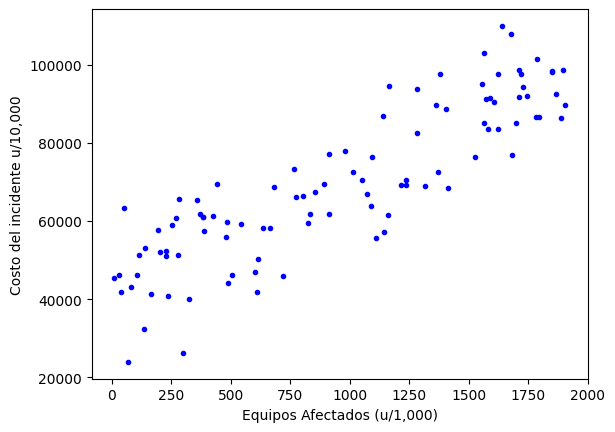

In [8]:
plt.plot(df['No_Equipos_afectados'], df['Costo'], "b.")
plt.xlabel("Equipos Afectados (u/1,000)")
plt.ylabel("Costo del incidente u/10,000")
plt.show()

# 4.- Construcción del Modelo.

In [18]:
from sklearn.linear_model import LinearRegression

In [23]:
#Construccion del modelo yb ajuste de la funcion de hipotesis.
lin_reg = LinearRegression()
lin_reg.fit(df['No_Equipos_afectados'].values.reshape(-1, 1), df['Costo'].values)

LinearRegression()

In [24]:
#Parametro Tetha 0
lin_reg.intercept_

42381.547166433375

In [26]:
# Parámetro Tetha 1
lin_reg.coef_

array([28.60876881])

In [28]:
#Prediccion para el valor minimo y maximo para el conjunto de datos de entrenamiento
X_min_max = np.array([[df["No_Equipos_afectados"].min()], [df["No_Equipos_afectados"].max()]])
y_train_pred = lin_reg.predict(X_min_max)

Text(0, 0.5, 'Costo del incidente')

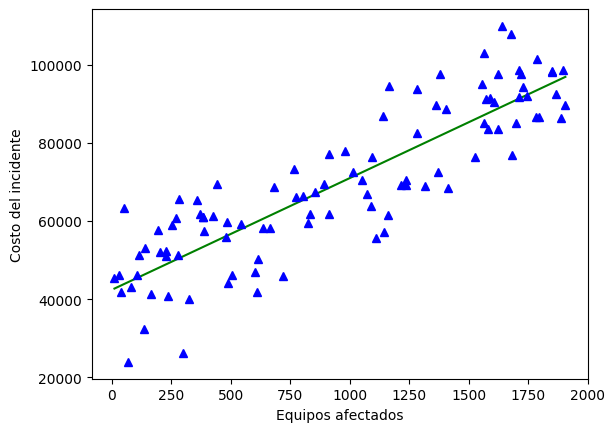

In [33]:
# Representacion grafica de la hipotesis generada
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(df['No_Equipos_afectados'], df['Costo'], "b^")
plt.xlabel("Equipos afectados")
plt.ylabel("Costo del incidente")


# 5.- Predicción de nuevos ejemplos

In [31]:
x_new = np.array([[1300]]) # Numero de equipos afectados
# Prediccion del costo que tendria el incidente.
Costo = lin_reg.predict(x_new)
print("El costo del incidente seria: $ ", int(Costo[0]))

El costo del incidente seria: $  79572


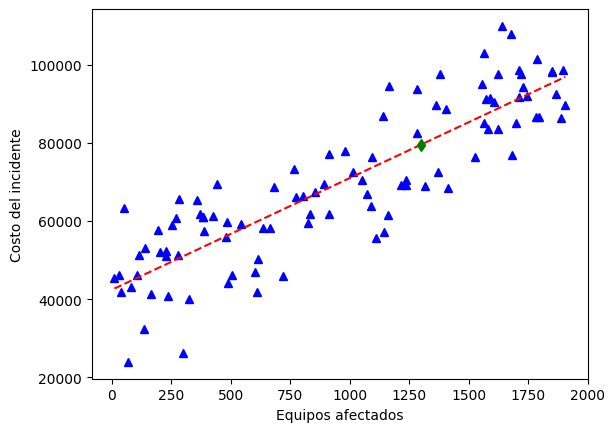

In [34]:
plt.plot(df["No_Equipos_afectados"], df["Costo"], "b^")
plt.plot(X_min_max, y_train_pred, "r--")
plt.plot(x_new, Costo, "gd")
plt.xlabel("Equipos afectados")
plt.ylabel('Costo del incidente')
plt.show()